In [1]:
%matplotlib qt
import mne
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\scripts")
sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\config")
import eeg_preprocessing as preprocessing
import vst_config as config

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Choose the subject to analyse

In [2]:
subject = 'VST_02_X'

# Event statistics

## Subject level

In [3]:
path_in = config.raw_data_paths[subject]
raw = mne.io.read_raw_brainvision(f'{config.work_dir}/{path_in}', preload=True)

annotations = raw.annotations

# Create a DataFrame to store annotation information
annotations_df = pd.DataFrame({
    'Description': annotations.description,
    'Count': 1,  
    'Duration': annotations.duration,
})

# Group by Description and aggregate counts, mean duration, and std duration
grouped_annotations = annotations_df.groupby('Description').agg({
    'Count': 'sum',
    'Duration': ['mean', 'std'],
}).reset_index()

# Rename columns 
grouped_annotations.columns = ['Description', 'Count', 'Mean Duration', 'Std Duration']

grouped_annotations

Extracting parameters from C:\Users\gautier\Données EEG - Supervised Project/./VST_Data/eeg data\VST_02_X\VST_VST_02_X_prod_task.vhdr...


Setting channel info structure...
Reading 0 ... 5028282  =      0.000 ...  5028.282 secs...


,Description,Count,Mean Duration,Std Duration
0,Marker/Impedance,20,0.001,0.0
1,New Segment/,10,0.001,0.0
2,Stimulus/s11,104,0.001,0.0
3,Stimulus/s111,104,0.001,0.0
4,Stimulus/s112,104,0.001,0.0
5,Stimulus/s113,104,0.001,0.0
6,Stimulus/s114,104,0.001,0.0
7,Stimulus/s12,104,0.001,0.0
8,Stimulus/s121,105,0.001,0.0
9,Stimulus/s122,104,0.001,0.0


## Segment level

In [4]:
preprocessed_raw = preprocessing.get_preprocessed_raw(subject, bad_channels_exclusion=False, ICA_exclusion=False)
raw_blocks = preprocessing.get_good_raw_blocks(preprocessed_raw)

C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\scripts\eeg_preprocessing.py:44: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, on_missing="warn", verbose=False)


[DONE] Importing data
[DONE] Filtering and resampling
[0, 1, 502, 1003, 1508, 1511, 2018, 2523, 3031, 3541, 4045]
[DONE] Extracting good blocks


In [5]:
for i in range(len(raw_blocks)):
    block = raw_blocks[i]
    print("\nSegment" + str(i) + " :\n")
    print(f'Time duration of block nO {str(i+1)}: {block.times[-1] - block.times[0]} seconds') 
    annotations = block.annotations

    # Create a DataFrame to store annotation information
    annotations_df = pd.DataFrame({
        'Description': annotations.description,
        'Count': 1,  
    })

    # Group by Description and aggregate counts, mean duration, and std duration
    grouped_annotations = annotations_df.groupby('Description').agg({
        'Count': 'sum',
    }).reset_index()

    print("\n")
    print(grouped_annotations)


Segment0 :

Time duration of block nO 1: 594.24 seconds


       Description  Count
0     end_prod_LHL     52
1     end_prod_LHS     52
2    go_signal_LHL     52
3    go_signal_LHS     52
4         press_HH     84
5   start_prod_LHL     52
6   start_prod_LHS     52
7  start_trial_LHL     52
8  start_trial_LHS     52

Segment1 :

Time duration of block nO 2: 580.66 seconds


       Description  Count
0     end_prod_LHL     52
1     end_prod_LHS     52
2    go_signal_LHL     52
3    go_signal_LHS     52
4         press_HH     84
5   start_prod_LHL     52
6   start_prod_LHS     52
7  start_trial_LHL     52
8  start_trial_LHS     52

Segment2 :

Time duration of block nO 3: 572.104 seconds


       Description  Count
0     end_prod_SHL     52
1     end_prod_SHS     52
2    go_signal_SHL     52
3    go_signal_SHS     52
4         press_SH     88
5   start_prod_SHL     52
6   start_prod_SHS     52
7  start_trial_SHL     52
8  start_trial_SHS     52

Segment3 :

Time duration of block nO 4: 

Using matplotlib as 2D backend.


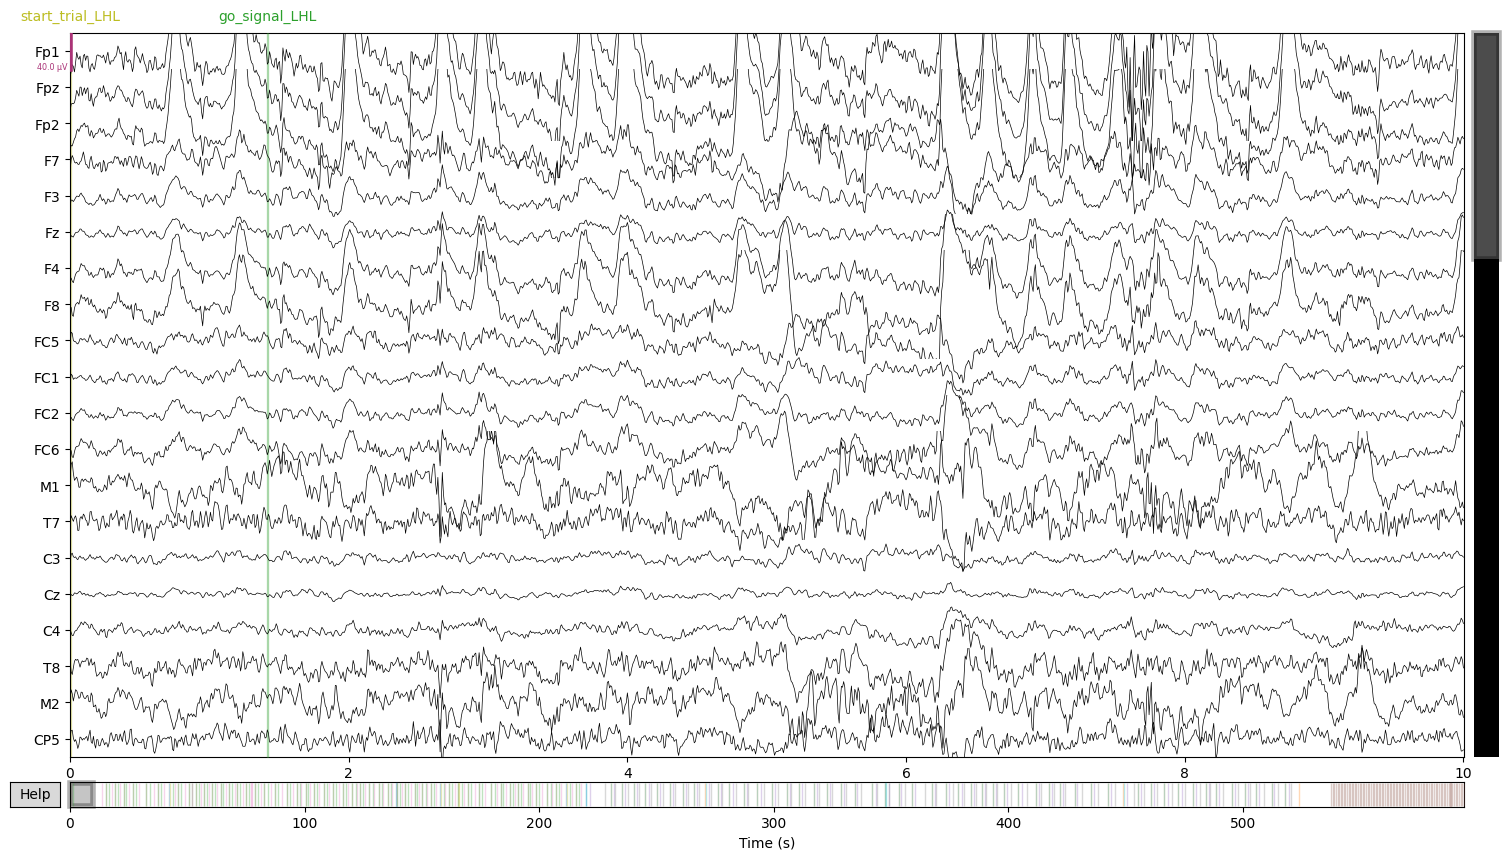

In [6]:
%matplotlib qt
raw_blocks[0].plot()

# Bad Channels Detection 

Manual Detection

Using matplotlib as 2D backend.


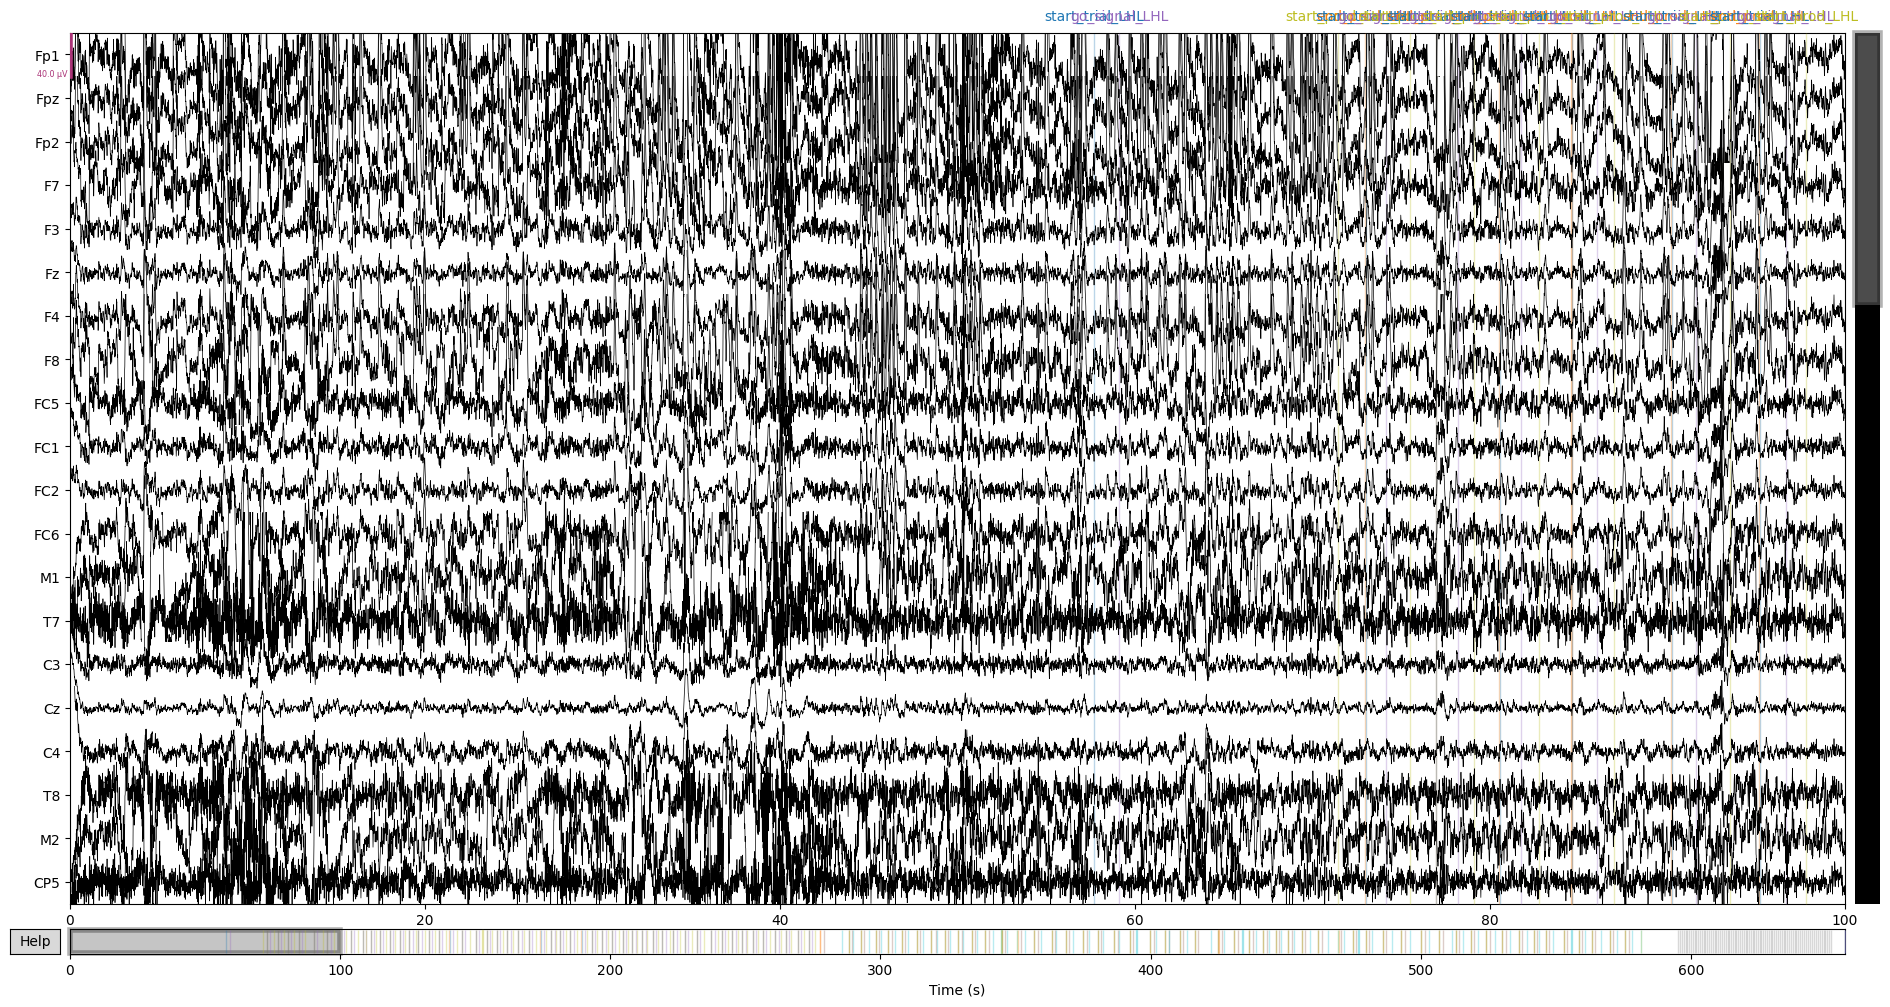

In [6]:
#For each block, plotting all the channels to check manually if there are any bad channels
raw_blocks[0].plot(duration=100)

# ICA

In [7]:
preprocessed_raw = preprocessing.get_preprocessed_raw(subject, bad_channels_exclusion=True, ICA_exclusion=False)

C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\scripts\eeg_preprocessing.py:44: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  raw.set_montage(montage, on_missing="warn", verbose=False)


[DONE] Importing data
[DONE] Filtering and resampling
[DONE] Excluding bad channels


Manually detect EOG ICA Components

In [8]:
# Perform ICA on all 63 channels
ica = mne.preprocessing.ICA(n_components=63, max_iter='auto', random_state=97)
ica.fit(preprocessed_raw)

Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 63 components


KeyboardInterrupt: 

Channels marked as bad:
none


In [ ]:
ica.plot_sources(preprocessed_raw, start=100, stop=200)
ica.plot_components()

Creating RawArray with float64 data, n_channels=64, n_times=1087873
    Range : 0 ... 1087872 =      0.000 ...  4351.488 secs
Ready.
Using matplotlib as 2D backend.


[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 585x260 with 3 Axes>]

Automatically detect EOG components

In [6]:
eog_indices, eog_scores = ica.find_bads_eog(preprocessed_raw, measure='zscore', threshold=4, verbose=False)

print('found eog indices: ' + str(eog_indices))

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics for eog components
ica.plot_properties(preprocessed_raw, picks=eog_indices, verbose=False)

found eog indices: [3]


[<Figure size 700x600 with 6 Axes>]

Save ICA without excluding bad components. Bad components are saved in the config file

In [7]:
ica_directory = "ica_solutions/"
file_name = subject + "-ica.fif"
ica.save(f"{config.work_dir}/{ica_directory+file_name}", overwrite=True)

Writing ICA solution to C:\Users\gautier\Données EEG - Supervised Project\ica_solutions\VST_03_Y-ica.fif...


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,114 iterations on raw data (1087873 samples)
ICA components,63
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


## Perform ICA analysis on multiple subjects at the same time

In [ ]:
subjects_list = config.subjects_list

for subject in subjects_list:
    preprocessed_raw = preprocessing.get_preprocessed_raw(subject, bad_channels_exclusion=True, ICA_exclusion=False)

    ica = mne.preprocessing.ICA(n_components=63, max_iter='auto', random_state=97)
    ica.fit(preprocessed_raw)

    ica.plot_sources(preprocessed_raw, start=100, stop=200, title=subject)
    ica.plot_components(title=subject)

    eog_indices, eog_scores = ica.find_bads_eog(preprocessed_raw, measure='zscore', threshold=4, verbose=False)

    print('found eog indices: ' + str(eog_indices))

    # barplot of ICA component "EOG match" scores
    ica.plot_scores(eog_scores, title=subject)

    # plot diagnostics for eog components
    ica.plot_properties(preprocessed_raw, picks=eog_indices, verbose=False, title=subject)

    ica_directory = "ica_solutions/"
    file_name = subject + "-ica.fif"
    ica.save(f"{config.work_dir}/{ica_directory+file_name}", overwrite=True)